In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Kaggle dataset, 1915-2023

In [2]:
rotten_tomatoes_kaggle = pd.read_excel('../data/movie_info_kaggle.xlsx')

In [3]:
english_rotten_tomatoes = rotten_tomatoes_kaggle[rotten_tomatoes_kaggle['originalLanguage'] == 'English']

In [4]:
rotten_tomatoes_dropna = english_rotten_tomatoes[(english_rotten_tomatoes['audienceScore'].notna()) & (english_rotten_tomatoes['tomatoMeter'].notna())]

In [5]:
rotten_tomatoes_drop_duplicates = rotten_tomatoes_dropna.drop_duplicates(subset=['id', 'title', 'audienceScore', 'tomatoMeter'], keep='first')

In [6]:
rotten_tomatoes_kaggle_final = rotten_tomatoes_drop_duplicates.drop(['ratingContents', 'originalLanguage', 'writer', 'distributor', 'soundMix'], axis=1)
rotten_tomatoes_kaggle_final = rotten_tomatoes_kaggle_final.rename(columns={'audienceScore': 'audience_score_kaggle', 'tomatoMeter': 'critic_score_kaggle'})
rotten_tomatoes_kaggle_final['critic_score_kaggle'] = rotten_tomatoes_kaggle_final['critic_score_kaggle'].astype(int)
rotten_tomatoes_kaggle_final['audience_score_kaggle'] = rotten_tomatoes_kaggle_final['audience_score_kaggle'].astype(int)
rotten_tomatoes_kaggle_final

,id,title,audience_score_kaggle,critic_score_kaggle,rating,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,director,boxOffice
5,adrift_2018,Adrift,65,69,PG-13,2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",Baltasar KormÃ¡kur,$31.4M
9,1035316-born_to_kill,Born to Kill,74,83,NaN,1947-04-30,2016-05-23,92.0,"Crime, Drama",Robert Wise,NaN
13,leap_of_faith_2019,Leap of Faith: William Friedkin on The Exorcist,86,93,NaN,NaT,2020-11-19,104.0,"Documentary, Mystery & thriller",Alexandre O. Philippe,NaN
20,sarah_palin_you_betcha,Sarah Palin: You Betcha!,61,32,NaN,2011-09-30,2017-03-08,90.0,Documentary,"Nick Broomfield,Joan Churchill",$10.5K
21,1005521-death_of_a_salesman,Death of a Salesman,75,100,NaN,NaT,2016-01-11,135.0,Drama,Volker SchlÃ¶ndorff,NaN
...,...,...,...,...,...,...,...,...,...,...,...
143227,chromophobia,Chromophobia,53,31,NaN,NaT,NaT,136.0,Drama,Martha Fiennes,NaN
143236,comic_book_confidential,Comic Book Confidential,62,75,NaN,NaT,2002-07-23,90.0,Documentary,Ron Mann,NaN
143247,summering,Summering,40,34,PG-13,2022-08-12,NaT,87.0,Drama,James Ponsoldt,$55.9K
143250,fun_size,Fun Size,47,25,PG-13,2012-10-26,2013-02-19,86.0,"Holiday, Comedy",Josh Schwartz,$9.4M


In [7]:
max_theater = rotten_tomatoes_kaggle_final['releaseDateTheaters'].max()
max_streaming = rotten_tomatoes_kaggle_final['releaseDateStreaming'].max()
max_theater, max_streaming

(Timestamp('2023-04-07 00:00:00'), Timestamp('2023-05-09 00:00:00'))

In [8]:
min_theater = rotten_tomatoes_kaggle_final['releaseDateTheaters'].min()
min_streaming = rotten_tomatoes_kaggle_final['releaseDateStreaming'].min()
min_theater, min_streaming

(Timestamp('1915-09-13 00:00:00'), Timestamp('1970-04-26 00:00:00'))

# Reddit dataset, 1970-2024

In [9]:
rotten_tomatoes_reddit = pd.read_excel('../data/movie_info_reddit.xlsx')

In [10]:
rotten_tomatoes_reddit = rotten_tomatoes_reddit.drop(['concat column', 'difference', 'id'], axis=1)

In [11]:
rotten_tomatoes_reddit_dropna = rotten_tomatoes_reddit[(rotten_tomatoes_reddit['audience_score'].notna()) & (rotten_tomatoes_reddit['critic_score'].notna())]

In [12]:
def url_id(link):
    standard_id = link.split('/')[-1]
    return standard_id

In [13]:
rotten_tomatoes_reddit_dropna['id'] = rotten_tomatoes_reddit_dropna['url'].apply(url_id)

C:\Users\amand\AppData\Local\Temp\ipykernel_13160\2867314043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_reddit_dropna['id'] = rotten_tomatoes_reddit_dropna['url'].apply(url_id)


In [14]:
rotten_tomatoes_reddit_drop_duplicates = rotten_tomatoes_reddit_dropna.drop_duplicates(subset=['title', 'critic_score', 'audience_score', 'id'], keep='first')

In [15]:
rotten_tomatoes_reddit_final = rotten_tomatoes_reddit_drop_duplicates.drop(['url'], axis=1) #drop url column
rotten_tomatoes_reddit_final = rotten_tomatoes_reddit_final[['id', 'title', 'release_date', 'critic_score', 'audience_score']] #keep relevant columns
rotten_tomatoes_reddit_final['critic_score'] = rotten_tomatoes_reddit_final['critic_score']*100 #convert from hundredths to hundreds
rotten_tomatoes_reddit_final['audience_score'] = rotten_tomatoes_reddit_final['audience_score']*100 #convert from hundredths to hundreds
rotten_tomatoes_reddit_final['critic_score'] = rotten_tomatoes_reddit_final['critic_score'].astype(int) #change to integer and convert to whole numbers
rotten_tomatoes_reddit_final['audience_score'] = rotten_tomatoes_reddit_final['audience_score'].astype(int) #change to integer and convert to whole numbers
rotten_tomatoes_reddit_final['release_date'] = rotten_tomatoes_reddit_final['release_date'].astype(str) #change type to string in order to edit string 
rotten_tomatoes_reddit_final['release_date_clean'] = rotten_tomatoes_reddit_final['release_date'].str.replace('Released', '') #removed 'Released' from column
rotten_tomatoes_reddit_final = rotten_tomatoes_reddit_final.drop(['release_date'], axis=1) #dropped old release_date column
rotten_tomatoes_reddit_final

,id,title,critic_score,audience_score,release_date_clean
0,love_story,Love Story,63,75,"Dec 16, 1970"
1,airport,Airport,75,54,"Apr 5, 1970"
2,aristocats,The Aristocats,64,70,"Dec 24, 1970"
3,little_big_man,Little Big Man,91,87,"Dec 14, 1970"
4,ryans_daughter,Ryan's Daughter,47,73,"Nov 9, 1970"
...,...,...,...,...,...
11600,divine_madness,Divine Madness,100,90,1980
11601,freuds_last_session,Freud's Last Session,45,72,Jan 19
11602,thin_blue_line,The Thin Blue Line,100,90,"Aug 25, 1988"
11603,i_was_born_but,"I Was Born, But ...",100,90,1932


# Webscrape dataset, streaming in 2025

In [16]:
rotten_tomatoes_webscrape_critic_splat = pd.read_excel('../data/critic_splat.xlsx')
rotten_tomatoes_webscrape_audience_splat = pd.read_excel('../data/audience_splat.xlsx')

In [17]:
movie_links_critic_splat_list = ['/m/a_working_man', '/m/where_the_crawdads_sing', '/m/it_ends_with_us', '/m/aladdin', '/m/i_still_believe', '/m/the_super_mario_bros_movie', '/m/uncharted_2022', '/m/sound_of_freedom', '/m/godzilla_x_kong_the_new_empire', '/m/midway_2019', '/m/transformers_rise_of_the_beasts', '/m/the_unbreakable_boy', '/m/clifford_the_big_red_dog', '/m/red_one', '/m/harold_and_the_purple_crayon', '/m/nefarious_2023', '/m/maleficent_mistress_of_evil', '/m/redeeming_love', '/m/the_boys_in_the_boat', '/m/the_art_of_racing_in_the_rain', '/m/reagan_2024', '/m/champions_2022', '/m/bob_marley_one_love', '/m/am_i_racist', '/m/angel_has_fallen', '/m/someone_like_you_2024', '/m/the_girl_who_believes_in_miracles', '/m/whitney_houston_i_wanna_dance_with_somebody', '/m/jesus_revolution', '/m/21_bridges', '/m/black_and_blue_2019', '/m/spirit_untamed', '/m/shaft_2019', '/m/overcomer', '/m/here_today_2021', '/m/no_safe_spaces', '/m/todos_caen']

In [18]:
movie_links_audience_splat_list = ['/m/the_new_boy', '/m/babygirl_2024', '/m/presence_2024', '/m/the_damned_2024_2', '/m/the_monkey', '/m/star_wars_the_last_jedi', '/m/carry_on', '/m/cuckoo_2024', '/m/arcadian', '/m/leave_the_world_behind_2023', '/m/captain_marvel', '/m/bring_them_down', '/m/emilia_perez', '/m/in_a_violent_nature', '/m/get_away', '/m/things_will_be_different', '/m/war_of_the_worlds', '/m/caveat_2021', '/m/uncut_gems', '/m/mulan_2020', '/m/the_lodge', '/m/ad_astra', '/m/1922_2017', '/m/the_lost_daughter', '/m/no_one_will_save_you', '/m/v_h_s_beyond', '/m/coming_home_in_the_dark', '/m/it_comes_at_night', '/m/high_life_2019', '/m/the_green_knight', '/m/rumours', '/m/the_lost_city_of_z', '/m/infinity_pool_2023', '/m/under_the_skin_2013', '/m/tuesday_2023', '/m/sausage_party', '/m/fair_play_2023', '/m/no_sudden_move', '/m/the_night_eats_the_world', '/m/shadow_in_the_cloud', '/m/cam', '/m/indiana_jones_and_the_kingdom_of_the_crystal_skull', '/m/alone_2020_2', '/m/i_care_a_lot', '/m/blair_witch_project', '/m/disappearance_at_clifton_hill', '/m/king_kong', '/m/1208173-splice', '/m/spy_kids', '/m/stopmotion', '/m/orion_and_the_dark', '/m/apostle_2018', '/m/im_thinking_of_ending_things', '/m/charlie_and_the_chocolate_factory', '/m/eileen', '/m/maestro_2023', '/m/between_the_temples', '/m/we_are_what_we_are_2013', '/m/the_little_hours', '/m/da_5_bloods', '/m/tale_of_tales', '/m/porno_2020', '/m/the_perfection', '/m/beowulf', '/m/backcountry', '/m/colossal', '/m/don_jon', '/m/relic', '/m/the_two_faces_of_january', '/m/piranha_3d', '/m/space_cowboys', '/m/personal_shopper', '/m/the_bfg_2016', '/m/everything_must_go', '/m/land_of_the_dead', '/m/spencer_2021', '/m/1057637-jungle_book', '/m/something_in_the_dirt', '/m/while_were_young', '/m/true_things']

In [19]:
#make id column - audience_splat
id_audience_splat_list = [link.replace('/m/','') for link in movie_links_audience_splat_list]
rotten_tomatoes_webscrape_audience_splat['id'] = id_audience_splat_list

In [20]:
#make id column - critic_splat
id_critic_splat_list = [link.replace('/m/','') for link in movie_links_critic_splat_list]
rotten_tomatoes_webscrape_critic_splat['id'] = id_critic_splat_list

In [21]:
rt_critic_splat = rotten_tomatoes_webscrape_critic_splat.drop(['Unnamed: 0', 'No. Critic Reviews', 'No. Audience Reviews'], axis=1) #drop url column
rt_critic_splat['Release Date'] = rt_critic_splat['Release Date'].astype(str) #change type to string in order to edit string 
rt_critic_splat['Release Date'] = rt_critic_splat['Release Date'].str.replace('Released', '')
rt_critic_splat['Critic Score'] = rt_critic_splat['Critic Score'].str.replace('%', '')
rt_critic_splat['Critic Score'] = pd.to_numeric(rt_critic_splat['Critic Score'], errors='coerce')
rt_critic_splat['Critic Score'] = rt_critic_splat['Critic Score'].astype(int)
rt_critic_splat['Audience Score'] = rt_critic_splat['Audience Score'].str.replace('%', '')
rt_critic_splat['Audience Score'] = pd.to_numeric(rt_critic_splat['Audience Score'], errors='coerce')
rt_critic_splat['Audience Score'] = rt_critic_splat['Audience Score'].astype(int)

In [22]:
def time_to_minutes(time_str):
    parts = time_str.split('h')
    hours = int(parts[0]) if parts[0] else 0
    minutes = int(parts[1].replace('m', '')) if len(parts) > 1 and parts[1].replace('m', '') else 0
    total_minutes = hours * 60 + minutes
    return total_minutes

In [23]:
rt_critic_splat['Move Length'] = rt_critic_splat['Move Length'].apply(time_to_minutes)

In [24]:
rt_critic_splat = rt_critic_splat.rename(columns={'Movie': 'Title', 'Critic Score': 'critic_score_2025', 'Audience Score': 'audience_score_2025', 'Move Length': 'runtime_minutes'})
rt_critic_splat = rt_critic_splat[['id', 'Title', 'critic_score_2025', 'audience_score_2025', 'Genre', 'Rating', 'Release Date', 'runtime_minutes']]

In [25]:
rt_audience_splat = rotten_tomatoes_webscrape_audience_splat.drop(['Unnamed: 0', 'No. Critic Reviews', 'No. Audience Reviews'], axis=1) #drop url column
rt_audience_splat['Release Date'] = rt_audience_splat['Release Date'].astype(str) #change type to string in order to edit string 
rt_audience_splat['Release Date'] = rt_audience_splat['Release Date'].str.replace('Released', '')
rt_audience_splat['Critic Score'] = rt_audience_splat['Critic Score'].str.replace('%', '')
rt_audience_splat['Critic Score'] = pd.to_numeric(rt_audience_splat['Critic Score'], errors='coerce')
rt_audience_splat['Critic Score'] = rt_audience_splat['Critic Score'].astype(int)
rt_audience_splat['Audience Score'] = rt_audience_splat['Audience Score'].str.replace('%', '')
rt_audience_splat['Audience Score'] = pd.to_numeric(rt_audience_splat['Audience Score'], errors='coerce')
rt_audience_splat['Audience Score'] = rt_audience_splat['Audience Score'].astype(int)

In [26]:
rt_audience_splat['Move Length'] = rt_audience_splat['Move Length'].apply(time_to_minutes)

In [27]:
rt_audience_splat = rt_audience_splat.rename(columns={'Movie': 'Title', 'Critic Score': 'critic_score_2025', 'Audience Score': 'audience_score_2025', 'Move Length': 'runtime_minutes'})
rt_audience_splat = rt_audience_splat[['id', 'Title', 'critic_score_2025', 'audience_score_2025', 'Genre', 'Rating', 'Release Date', 'runtime_minutes']]

In [28]:
rt_splat_master = pd.concat([rt_audience_splat, rt_critic_splat])

In [29]:
rt_splat_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 36
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   117 non-null    object
 1   Title                117 non-null    object
 2   critic_score_2025    117 non-null    int32 
 3   audience_score_2025  117 non-null    int32 
 4   Genre                117 non-null    object
 5   Rating               117 non-null    object
 6   Release Date         117 non-null    object
 7   runtime_minutes      117 non-null    int64 
dtypes: int32(2), int64(1), object(5)
memory usage: 7.3+ KB


# Merge, clean and create Final Rotten Tomatoes dataset

In [30]:
#make id columns the same data type
rotten_tomatoes_kaggle_final['id'] = rotten_tomatoes_kaggle_final['id'].astype(str)
rotten_tomatoes_reddit_final['id']  = rotten_tomatoes_reddit_final['id'].astype(str)
rt_splat_master['id'] = rt_splat_master['id'].astype(str)

In [31]:
#merge two Rotten Tomatoes dataframes
rotten_tomatoes_partial = pd.merge(rotten_tomatoes_kaggle_final, rotten_tomatoes_reddit_final, on='id', how='outer')
rotten_tomatoes = pd.merge(rotten_tomatoes_partial, rt_splat_master, on='id', how='outer')

In [32]:
#combine titles
rotten_tomatoes['title_x'] = rotten_tomatoes['title_x'].fillna(rotten_tomatoes['title_y'])
rotten_tomatoes = rotten_tomatoes.drop(['title_y'], axis=1)
rotten_tomatoes['title_x'] = rotten_tomatoes['title_x'].fillna(rotten_tomatoes['Title'])
rotten_tomatoes = rotten_tomatoes.drop(['Title'], axis=1)

In [33]:
#combine genres
rotten_tomatoes['genre'] = rotten_tomatoes['genre'].fillna(rotten_tomatoes['Genre'])
rotten_tomatoes = rotten_tomatoes.drop(['Genre'], axis=1)

In [34]:
#combine runtimes
rotten_tomatoes['runtimeMinutes'] = rotten_tomatoes['runtimeMinutes'].fillna(rotten_tomatoes['runtime_minutes'])
rotten_tomatoes = rotten_tomatoes.drop(['runtime_minutes'], axis=1)

In [35]:
#combine ratings
rotten_tomatoes['rating'] = rotten_tomatoes['rating'].fillna(rotten_tomatoes['Rating'])
rotten_tomatoes = rotten_tomatoes.drop(['Rating'], axis=1)

In [36]:
rotten_tomatoes = rotten_tomatoes.rename(columns={'title_x': 'title', 'audience_score_kaggle': 'audience_score_2023', 'critic_score_kaggle': 'critic_score_2023', 'critic_score': 'critic_score_2024', 'audience_score': 'audience_score_2024'})
rotten_tomatoes = rotten_tomatoes[['id', 'title', 'critic_score_2023', 'critic_score_2024', 'critic_score_2025', 'audience_score_2023', 'audience_score_2024', 'audience_score_2025', 'runtimeMinutes', 'rating', 'genre', 'director', 'boxOffice', 'releaseDateTheaters', 'releaseDateStreaming', 'release_date_clean', 'Release Date']]

In [37]:
rotten_tomatoes_export = 'rotten_tomatoes_export.xlsx'

In [38]:
rotten_tomatoes.to_excel(rotten_tomatoes_export)

In [39]:
rotten_tomatoes_import = pd.read_excel('../data/rotten_tomatoes_import.xlsx')

In [41]:
rotten_tomatoes_final = rotten_tomatoes_import.drop(['Unnamed: 0'], axis=1)
rotten_tomatoes_final['critic_score'] = rotten_tomatoes_final['critic_score'].fillna(rotten_tomatoes_final['critic_score_2024'])
rotten_tomatoes_final['critic_score'] = rotten_tomatoes_final['critic_score'].fillna(rotten_tomatoes_final['critic_score_2023'])
rotten_tomatoes_final['audience_score'] = rotten_tomatoes_final['audience_score'].fillna(rotten_tomatoes_final['audience_score_2024'])
rotten_tomatoes_final['audience_score'] = rotten_tomatoes_final['audience_score'].fillna(rotten_tomatoes_final['audience_score_2023'])
rotten_tomatoes_final['releaseDateTheaters'] = rotten_tomatoes_final['releaseDateTheaters'].fillna(rotten_tomatoes_final['Release_Date'])
rotten_tomatoes_final['releaseDateTheaters'] = rotten_tomatoes_final['releaseDateTheaters'].fillna(rotten_tomatoes_final['release_date_clean'])

In [42]:
rotten_tomatoes_final['releaseMonthTheaters'] = rotten_tomatoes_final['releaseDateTheaters'].dt.month
rotten_tomatoes_final['releaseYearTheaters'] = rotten_tomatoes_final['releaseDateTheaters'].dt.year
rotten_tomatoes_final['releaseMonthStreaming'] = rotten_tomatoes_final['releaseDateStreaming'].dt.month
rotten_tomatoes_final['releaseYearStreaming'] = rotten_tomatoes_final['releaseDateStreaming'].dt.year

In [43]:
rotten_tomatoes_final = rotten_tomatoes_final.drop(['Release_Date', 'release_date_clean'], axis=1)

In [44]:
rotten_tomatoes_final_file = 'rotten_tomatoes_final.xlsx'
rotten_tomatoes_final.to_excel(rotten_tomatoes_final_file)

# Create directors dataset

In [45]:
longest_director_index = rotten_tomatoes_final['director'].str.len().idxmax()
longest_director = rotten_tomatoes_final['director'][longest_director_index]
longest_director #19 commas

'Angela Bettis,HÃ©lÃ¨ne Cattet,Ernesto DÃ\xadaz Espinoza,Jason Eisener,Bruno Forzani,AdriÃ¡n GarcÃ\xada Bogliano,Xavier Gens,Noboru Iguchi,Thomas Cappelen Malling,Jorge Michel Grau,Yoshihiro Nishimura,Banjong Pisanthanakun,Simon Rumley,Marcel Sarmiento,Jon Schnepp,Srdjan Spasojevic,Timo Tjahjanto,Andrew Traucki,Nacho Vigalondo,Jake West'

In [46]:
rotten_tomatoes_directors = rotten_tomatoes_final[['id', 'title', 'director']]

In [47]:
rotten_tomatoes_directors[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']] = rotten_tomatoes_directors['director'].str.split(',', expand=True)

C:\Users\amand\AppData\Local\Temp\ipykernel_13160\2750927327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_directors[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']] = rotten_tomatoes_directors['director'].str.split(',', expand=True)
C:\Users\amand\AppData\Local\Temp\ipykernel_13160\2750927327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [48]:
rotten_tomatoes_directors_file = 'rotten_tomatoes_directors.xlsx'
rotten_tomatoes_directors.to_excel(rotten_tomatoes_directors_file)

# Create genres dataset

In [49]:
longest_genre_index = rotten_tomatoes_final['genre'].str.len().idxmax()
longest_genre = rotten_tomatoes_final['genre'][longest_genre_index]
longest_genre #6 commas

'Kids & family, Holiday, Adventure, Musical, Comedy, Fantasy, Animation'

In [50]:
rotten_tomatoes_genre = rotten_tomatoes_final[['id', 'title', 'genre']]

In [51]:
rotten_tomatoes_genre[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']] = rotten_tomatoes_genre['genre'].str.split(',', expand=True)

C:\Users\amand\AppData\Local\Temp\ipykernel_13160\425197104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_genre[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']] = rotten_tomatoes_genre['genre'].str.split(',', expand=True)
C:\Users\amand\AppData\Local\Temp\ipykernel_13160\425197104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_genre[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']] = rotten_tomatoes_genre['

In [52]:
rotten_tomatoes_genre['genre'] = rotten_tomatoes_genre['genre'].str.lstrip()
rotten_tomatoes_genre['genre_1'] = rotten_tomatoes_genre['genre_1'].str.lstrip()
rotten_tomatoes_genre['genre_2'] = rotten_tomatoes_genre['genre_2'].str.lstrip()
rotten_tomatoes_genre['genre_3'] = rotten_tomatoes_genre['genre_3'].str.lstrip()
rotten_tomatoes_genre['genre_4'] = rotten_tomatoes_genre['genre_4'].str.lstrip()
rotten_tomatoes_genre['genre_5'] = rotten_tomatoes_genre['genre_5'].str.lstrip()
rotten_tomatoes_genre['genre_6'] = rotten_tomatoes_genre['genre_6'].str.lstrip()
rotten_tomatoes_genre['genre_7'] = rotten_tomatoes_genre['genre_7'].str.lstrip()

C:\Users\amand\AppData\Local\Temp\ipykernel_13160\3357464343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_genre['genre'] = rotten_tomatoes_genre['genre'].str.lstrip()
C:\Users\amand\AppData\Local\Temp\ipykernel_13160\3357464343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_genre['genre_1'] = rotten_tomatoes_genre['genre_1'].str.lstrip()
C:\Users\amand\AppData\Local\Temp\ipykernel_13160\3357464343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [53]:
rotten_tomatoes_genre_file = 'rotten_tomatoes_genre.xlsx'
rotten_tomatoes_genre.to_excel(rotten_tomatoes_genre_file)

In [54]:
rotten_tomatoes_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23897 entries, 0 to 23896
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       23897 non-null  object
 1   title    23897 non-null  object
 2   genre    22381 non-null  object
 3   genre_1  22381 non-null  object
 4   genre_2  10994 non-null  object
 5   genre_3  3638 non-null   object
 6   genre_4  973 non-null    object
 7   genre_5  195 non-null    object
 8   genre_6  38 non-null     object
 9   genre_7  3 non-null      object
dtypes: object(10)
memory usage: 1.8+ MB


# Splat datasets

In [55]:
rotten_tomatoes_high_critic = rotten_tomatoes_final[(rotten_tomatoes_final['critic_score'] >= 60) & (rotten_tomatoes_final['audience_score'] < 60)]

In [56]:
rotten_tomatoes_high_audience = rotten_tomatoes_final[(rotten_tomatoes_final['critic_score'] < 60) & (rotten_tomatoes_final['audience_score'] >= 60)]

In [57]:
rotten_tomatoes_high_high = rotten_tomatoes_final[(rotten_tomatoes_final['critic_score'] >= 60) & (rotten_tomatoes_final['audience_score'] >= 60)]

In [58]:
rotten_tomatoes_high_critic_extreme = rotten_tomatoes_final[(rotten_tomatoes_final['critic_score'] >= 80) & (rotten_tomatoes_final['audience_score'] < 40)]

In [59]:
rotten_tomatoes_high_audience_extreme = rotten_tomatoes_final[(rotten_tomatoes_final['critic_score'] < 40) & (rotten_tomatoes_final['audience_score'] >= 80)]

In [60]:
rotten_tomatoes_high_high_extreme = rotten_tomatoes_final[(rotten_tomatoes_final['critic_score'] >= 80) & (rotten_tomatoes_final['audience_score'] >= 80)]

In [61]:
rotten_tomatoes_high_audience_file = 'rotten_tomatoes_high_audience.xlsx'
rotten_tomatoes_high_audience.to_excel(rotten_tomatoes_high_audience_file)

In [62]:
rotten_tomatoes_high_critic_file = 'rotten_tomatoes_high_critic.xlsx'
rotten_tomatoes_high_critic.to_excel(rotten_tomatoes_high_critic_file)

## Duplicate titles list

In [63]:
duplicate_high_critic = rotten_tomatoes_high_critic['title'].duplicated()
duplicate_high_critic_titles = rotten_tomatoes_high_critic[duplicate_high_critic]

In [64]:
duplicate_high_critic_titles_list = duplicate_high_critic_titles['title'].tolist()
duplicate_high_critic_titles_list

['Romeo and Juliet',
 'Arcadia',
 'Beach Rats',
 'Beyond Skyline',
 'Beyond the Black Rainbow',
 'A Bigger Splash',
 'Black Friday',
 'Blue Sky',
 'Byzantium',
 'CafÃ© Society',
 'Cedar Rapids',
 'Cloak and Dagger',
 'Concussion',
 'The Crazies',
 'Crimes of the Future',
 'Dementia',
 "Don't Be Afraid of the Dark",
 'Drinking Buddies',
 'Echo Park',
 'Elvis & Nixon',
 'Far North',
 "Andy Warhol's Frankenstein",
 'Freaky Friday',
 'Freaky Friday',
 'Godzilla vs. Hedorah',
 'Great Directors',
 'Greta',
 'Guy and Madeline on a Park Bench',
 'High Life',
 'Howl',
 'I Am Greta',
 'In Country',
 'Invaders From Mars',
 'Journey to the Center of the Earth',
 'Juggernaut',
 'Keanu',
 'Keyhole',
 'Kiss of the Damned',
 'Kites',
 'Death Watch',
 'Love',
 'Lucky',
 'Margaret',
 'Memoria',
 'Morning Glory',
 'My Blue Heaven',
 'Nanny McPhee Returns',
 'Night People',
 'Nighthawks',
 'Noah',
 'Nurse',
 'On the Rocks',
 'Paterno',
 'Peter Rabbit',
 'Piranha',
 'Possessor: Uncut',
 'The Private Lives 

In [65]:
duplicate_high_audience = rotten_tomatoes_high_audience['title'].duplicated()
duplicate_high_audience_titles = rotten_tomatoes_high_audience[duplicate_high_audience]

In [66]:
duplicate_high_audience_titles_list = duplicate_high_audience_titles['title'].tolist()
duplicate_high_audience_titles_list

[]

In [67]:
duplicate_high_high_extreme = rotten_tomatoes_high_high_extreme['title'].duplicated()
duplicate_high_high_extreme_titles = rotten_tomatoes_high_high_extreme[duplicate_high_high_extreme]

In [68]:
duplicate_high_high_extreme_titles_list = duplicate_high_high_extreme_titles['title'].tolist()
duplicate_high_high_extreme_titles_list

['Invasion of the Body Snatchers',
 'The Letter',
 'Hamlet',
 'Imitation of Life',
 'Of Mice and Men',
 'The General',
 'Spellbound',
 'A Quiet Place',
 'A Star Is Born',
 'A Star Is Born',
 'Ai Weiwei: Never Sorry',
 'Apollo 10 1/2: A Space Age Childhood',
 'Avatar',
 'Bad Education',
 'Beauty and the Beast',
 'Boy',
 'Brigsby Bear',
 'Bros',
 "Brother's Keeper",
 'Captain America: The Winter Soldier',
 'Chasing Ice',
 'Coming Home',
 'Creed',
 'Disclosure',
 'Django Unchained',
 'Dogfight',
 'Ever After: A Cinderella Story',
 'Finding Nemo',
 'Freaks',
 'Fresh',
 'Get Carter',
 'Good Night, and Good Luck.',
 'Goodfellas',
 'Hairspray',
 'Hamilton',
 'Hamlet',
 'Head Over Heels',
 'Imagine: John Lennon',
 'Inside Job',
 'Joan Rivers: A Piece of Work',
 'Jurassic Park',
 'Kubo and the Two Strings',
 'Life of Pi',
 'Little Women',
 'Edge of Tomorrow',
 "Marvel's the Avengers",
 'Matewan',
 "Michael Jackson's This Is It",
 'Missing',
 'Monsters, Inc.',
 'Mosul',
 'A Nightmare on Elm Stre

In [69]:
len(duplicate_high_audience_titles_list)

0

In [70]:
len(duplicate_high_critic_titles_list)

138

In [71]:
len(duplicate_high_high_extreme_titles_list)

144

# Release dates needed link list

In [72]:
id_list = rotten_tomatoes['id'].tolist()
id_list

['1-day',
 '10',
 '1000013_12_angry_men',
 '10000604-porgy_and_bess',
 '1000079-20000_leagues_under_the_sea',
 '10000_bc',
 '10001126-brave',
 '1000123-310_to_yuma',
 '10002008-charly',
 '1000204-abraham_lincoln',
 '10002076-black_and_white',
 '1000218-accident',
 '1000224-accused',
 '10002478-falls',
 '10002516-lost_city',
 '10002519-breaking_point',
 '1000253-adams_rib',
 '10002635-bridge_of_san_luis_rey',
 '10002673-prowler',
 '10002693-sniper',
 '10002709-undercover_man',
 '10002759-crisis',
 '10003184-turning_point',
 '10003276-criminal',
 '10003284-the_zodiac',
 '1000334-adventures_of_mark_twain',
 '10003437-deep_blue',
 '1000355-adventures_of_robin_hood',
 '10003660-americano',
 '10003876-man_hunt',
 '10003925-dead_end',
 '10004050-bandwagon',
 '10004069-whore',
 '10004275-army_of_one',
 '10004288-running_scared',
 '10004352-going_the_distance',
 '10004490-mourning_becomes_electra',
 '10004504-ultraviolet',
 '10004617-letter',
 '10004635-home_of_the_brave',
 '10004659-arthur',
 

In [73]:
full_links = [('https://rottentomatoes.com/m/' + link) for link in id_list]
full_links

['https://rottentomatoes.com/m/1-day',
 'https://rottentomatoes.com/m/10',
 'https://rottentomatoes.com/m/1000013_12_angry_men',
 'https://rottentomatoes.com/m/10000604-porgy_and_bess',
 'https://rottentomatoes.com/m/1000079-20000_leagues_under_the_sea',
 'https://rottentomatoes.com/m/10000_bc',
 'https://rottentomatoes.com/m/10001126-brave',
 'https://rottentomatoes.com/m/1000123-310_to_yuma',
 'https://rottentomatoes.com/m/10002008-charly',
 'https://rottentomatoes.com/m/1000204-abraham_lincoln',
 'https://rottentomatoes.com/m/10002076-black_and_white',
 'https://rottentomatoes.com/m/1000218-accident',
 'https://rottentomatoes.com/m/1000224-accused',
 'https://rottentomatoes.com/m/10002478-falls',
 'https://rottentomatoes.com/m/10002516-lost_city',
 'https://rottentomatoes.com/m/10002519-breaking_point',
 'https://rottentomatoes.com/m/1000253-adams_rib',
 'https://rottentomatoes.com/m/10002635-bridge_of_san_luis_rey',
 'https://rottentomatoes.com/m/10002673-prowler',
 'https://rotten

In [74]:
len(full_links)

24014

def rotten_tomatoes_general_info(url):
    response_URL_rotten_tomatoes = requests.get(url)
    soup_rotten_tomatoes = BeautifulSoup(response_URL_rotten_tomatoes.text)
    rotten_tomatoes_info = soup_rotten_tomatoes.find_all(slot='metadataProp') #general info
    rotten_tomatoes_info_clean = [info.text.strip() for info in rotten_tomatoes_info]
    return rotten_tomatoes_info_clean

rotten_tomatoes_general = [rotten_tomatoes_general_info(url) for url in full_links]
rotten_tomatoes_general

# Data Q's

## 1 - Has there been an increase over the years in the number of movies highly rated by audiences but panned by critics? What about the number of movies highly rated by critics but that bombed with audiences?

In [75]:
#groupby year for high critic datasets
rt_high_critic_theater_years = rotten_tomatoes_high_critic.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_high_critic_streaming_years = rotten_tomatoes_high_critic.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [76]:
#groupby year for high audience datasets
rt_high_audience_theater_years = rotten_tomatoes_high_audience.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_high_audience_streaming_years = rotten_tomatoes_high_audience.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [77]:
#groupby year for high-high datasets
rt_high_high_theater_years = rotten_tomatoes_high_high.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_high_high_streaming_years = rotten_tomatoes_high_high.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [78]:
#groupby year for high critic extreme datasets
rt_high_critic_extreme_theater_years = rotten_tomatoes_high_critic_extreme.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_high_critic_extreme_streaming_years = rotten_tomatoes_high_critic_extreme.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [79]:
#groupby year for high audience extreme datasets
rt_high_audience_extreme_theater_years = rotten_tomatoes_high_audience_extreme.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_high_audience_extreme_streaming_years = rotten_tomatoes_high_audience_extreme.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [80]:
#groupby year for high-high extreme datasets
rt_high_high_extreme_theater_years = rotten_tomatoes_high_high_extreme.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_high_high_extreme_streaming_years = rotten_tomatoes_high_high_extreme.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [81]:
#groupby year master totals
rt_total_theater_years = rotten_tomatoes_final.groupby('releaseYearTheaters', as_index = False)['releaseYearTheaters'].value_counts()
rt_total_streaming_years = rotten_tomatoes_final.groupby('releaseYearStreaming', as_index = False)['releaseYearStreaming'].value_counts()

In [82]:
#merge master totals with each dataset
rt_high_critic_theater_years_pct = pd.merge(rt_high_critic_theater_years, rt_total_theater_years, on='releaseYearTheaters', how='left')
rt_high_critic_streaming_years_pct = pd.merge(rt_high_critic_streaming_years, rt_total_streaming_years, on='releaseYearStreaming', how='left')
rt_high_audience_theater_years_pct = pd.merge(rt_high_audience_theater_years, rt_total_theater_years, on='releaseYearTheaters', how='left')
rt_high_audience_streaming_years_pct = pd.merge(rt_high_audience_streaming_years, rt_total_streaming_years, on='releaseYearStreaming', how='left')
rt_high_high_theater_years_pct = pd.merge(rt_high_high_theater_years, rt_total_theater_years, on='releaseYearTheaters', how='left')
rt_high_high_streaming_years_pct = pd.merge(rt_high_high_streaming_years, rt_total_streaming_years, on='releaseYearStreaming', how='left')
rt_high_critic_extreme_theater_years_pct = pd.merge(rt_high_critic_extreme_theater_years, rt_total_theater_years, on='releaseYearTheaters', how='left')
rt_high_critic_extreme_streaming_years_pct = pd.merge(rt_high_critic_extreme_streaming_years, rt_total_streaming_years, on='releaseYearStreaming', how='left')
rt_high_audience_extreme_theater_years_pct = pd.merge(rt_high_audience_extreme_theater_years, rt_total_theater_years, on='releaseYearTheaters', how='left')
rt_high_audience_extreme_streaming_years_pct = pd.merge(rt_high_audience_extreme_streaming_years, rt_total_streaming_years, on='releaseYearStreaming', how='left')
rt_high_high_extreme_theater_years_pct = pd.merge(rt_high_high_extreme_theater_years, rt_total_theater_years, on='releaseYearTheaters', how='left')
rt_high_high_extreme_streaming_years_pct = pd.merge(rt_high_high_extreme_streaming_years, rt_total_streaming_years, on='releaseYearStreaming', how='left')

In [83]:
#rename columns
rt_high_critic_theater_years_pct = rt_high_critic_theater_years_pct.rename(columns={'count_x': 'high_critic_total', 'count_y': 'theater_total'})
rt_high_critic_streaming_years_pct = rt_high_critic_streaming_years_pct.rename(columns={'count_x': 'high_critic_total', 'count_y': 'streaming_total'})
rt_high_audience_theater_years_pct = rt_high_audience_theater_years_pct.rename(columns={'count_x': 'high_audience_total', 'count_y': 'theater_total'})
rt_high_audience_streaming_years_pct = rt_high_audience_streaming_years_pct.rename(columns={'count_x': 'high_audience_total', 'count_y': 'streaming_total'})
rt_high_high_theater_years_pct = rt_high_high_theater_years_pct.rename(columns={'count_x': 'high_high_total', 'count_y': 'theater_total'})
rt_high_high_streaming_years_pct = rt_high_high_streaming_years_pct.rename(columns={'count_x': 'high_high_total', 'count_y': 'streaming_total'})
rt_high_critic_extreme_theater_years_pct = rt_high_critic_extreme_theater_years_pct.rename(columns={'count_x': 'high_critic_extreme_total', 'count_y': 'theater_total'})
rt_high_critic_extreme_streaming_years_pct = rt_high_critic_extreme_streaming_years_pct.rename(columns={'count_x': 'high_critic_extreme_total', 'count_y': 'streaming_total'})
rt_high_audience_extreme_theater_years_pct = rt_high_audience_extreme_theater_years_pct.rename(columns={'count_x': 'high_audience_extreme_total', 'count_y': 'theater_total'})
rt_high_audience_extreme_streaming_years_pct = rt_high_audience_extreme_streaming_years_pct.rename(columns={'count_x': 'high_audience_extreme_total', 'count_y': 'streaming_total'})
rt_high_high_extreme_theater_years_pct = rt_high_high_extreme_theater_years_pct.rename(columns={'count_x': 'high_high_extreme_total', 'count_y': 'theater_total'})
rt_high_high_extreme_streaming_years_pct = rt_high_high_extreme_streaming_years_pct.rename(columns={'count_x': 'high_high_extreme_total', 'count_y': 'streaming_total'})

In [84]:
#create percentage column
rt_high_critic_theater_years_pct['pct'] = round(rt_high_critic_theater_years_pct['high_critic_total']/rt_high_critic_theater_years_pct['theater_total']*100,2)
rt_high_critic_streaming_years_pct['pct'] = round(rt_high_critic_streaming_years_pct['high_critic_total']/rt_high_critic_streaming_years_pct['streaming_total']*100,2)
rt_high_audience_theater_years_pct['pct'] = round(rt_high_audience_theater_years_pct['high_audience_total']/rt_high_audience_theater_years_pct['theater_total']*100,2)
rt_high_audience_streaming_years_pct['pct'] = round(rt_high_audience_streaming_years_pct['high_audience_total']/rt_high_audience_streaming_years_pct['streaming_total']*100,2)
rt_high_high_theater_years_pct['pct'] = round(rt_high_high_theater_years_pct['high_high_total']/rt_high_high_theater_years_pct['theater_total']*100,2)
rt_high_high_streaming_years_pct['pct'] = round(rt_high_high_streaming_years_pct['high_high_total']/rt_high_high_streaming_years_pct['streaming_total']*100,2)
rt_high_critic_extreme_theater_years_pct['pct'] = round(rt_high_critic_extreme_theater_years_pct['high_critic_extreme_total']/rt_high_critic_theater_years_pct['theater_total']*100,2)
rt_high_critic_extreme_streaming_years_pct['pct'] = round(rt_high_critic_extreme_streaming_years_pct['high_critic_extreme_total']/rt_high_critic_streaming_years_pct['streaming_total']*100,2)
rt_high_audience_extreme_theater_years_pct['pct'] = round(rt_high_audience_extreme_theater_years_pct['high_audience_extreme_total']/rt_high_audience_theater_years_pct['theater_total']*100,2)
rt_high_audience_extreme_streaming_years_pct['pct'] = round(rt_high_audience_extreme_streaming_years_pct['high_audience_extreme_total']/rt_high_audience_streaming_years_pct['streaming_total']*100,2)
rt_high_high_extreme_theater_years_pct['pct'] = round(rt_high_high_extreme_theater_years_pct['high_high_extreme_total']/rt_high_high_extreme_theater_years_pct['theater_total']*100,2)
rt_high_high_extreme_streaming_years_pct['pct'] = round(rt_high_high_extreme_streaming_years_pct['high_high_extreme_total']/rt_high_high_extreme_streaming_years_pct['streaming_total']*100,2)

Text(0.5, 1.0, 'High Critic/Low Audience Percentage Over Time')

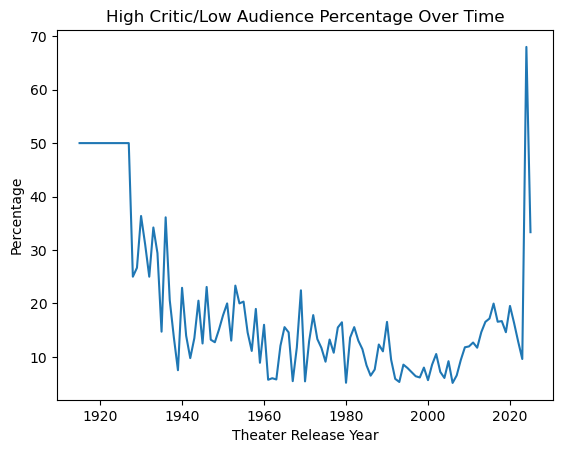

In [87]:
plt.plot('releaseYearTheaters', 'pct', data=rt_high_critic_theater_years_pct)
plt.xlabel('Theater Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/Low Audience Percentage Over Time')

Text(0.5, 1.0, 'High Critic/Low Audience Percentage Over Time')

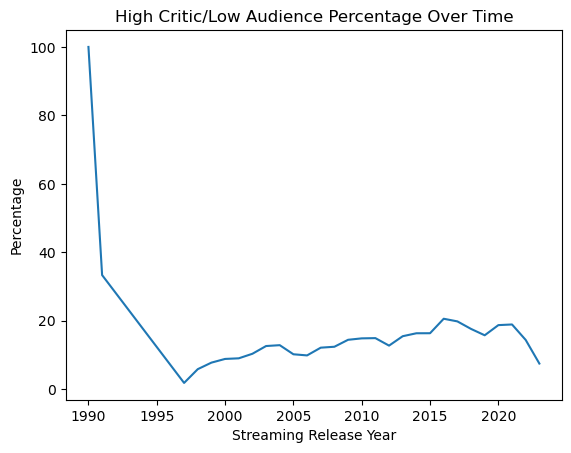

In [88]:
plt.plot('releaseYearStreaming', 'pct', data=rt_high_critic_streaming_years_pct)
plt.xlabel('Streaming Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/Low Audience Percentage Over Time')

Text(0.5, 1.0, 'Low Critic/High Audience Percentage Over Time')

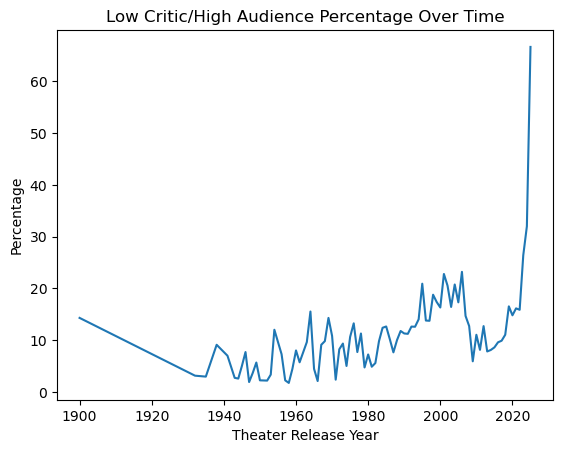

In [89]:
plt.plot('releaseYearTheaters', 'pct', data=rt_high_audience_theater_years_pct)
plt.xlabel('Theater Release Year')                            
plt.ylabel('Percentage')
plt.title('Low Critic/High Audience Percentage Over Time')

Text(0.5, 1.0, 'Low Critic/High Audience Percentage Over Time')

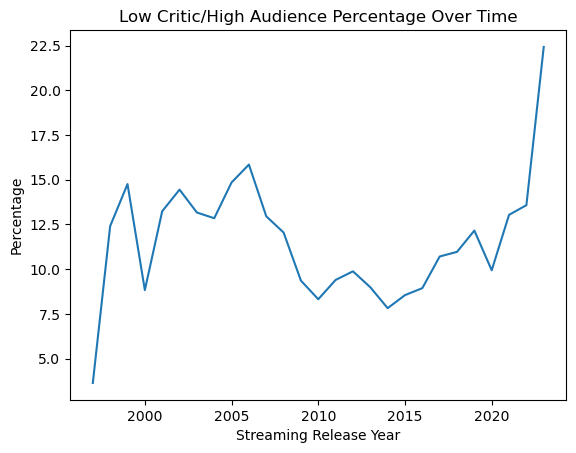

In [90]:
plt.plot('releaseYearStreaming', 'pct', data=rt_high_audience_streaming_years_pct)
plt.xlabel('Streaming Release Year')                            
plt.ylabel('Percentage')
plt.title('Low Critic/High Audience Percentage Over Time')

Text(0.5, 1.0, 'High Critic/High Audience Percentage Over Time')

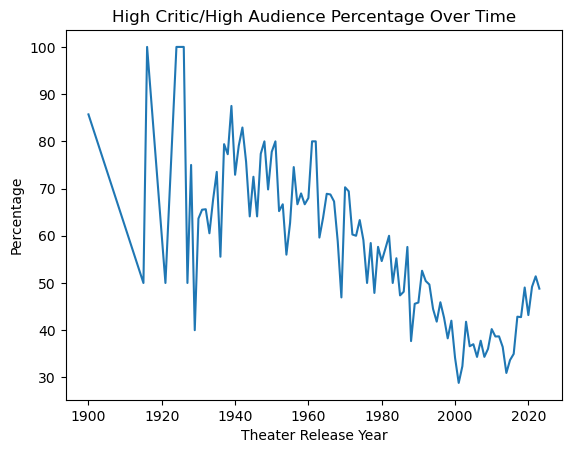

In [91]:
plt.plot('releaseYearTheaters', 'pct', data=rt_high_high_theater_years_pct)
plt.xlabel('Theater Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/High Audience Percentage Over Time')

Text(0.5, 1.0, 'High Critic/High Audience Percentage Over Time')

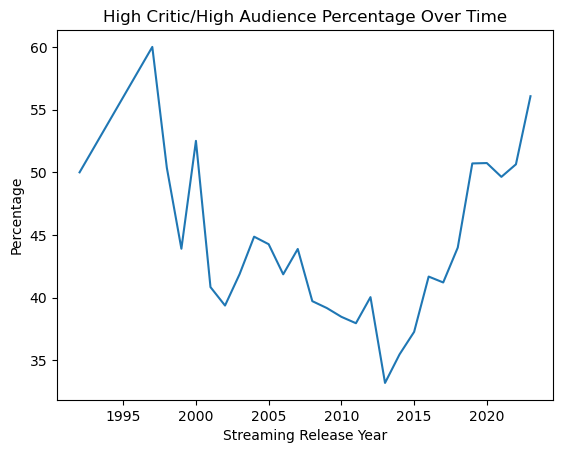

In [92]:
plt.plot('releaseYearStreaming', 'pct', data=rt_high_high_streaming_years_pct)
plt.xlabel('Streaming Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/High Audience Percentage Over Time')

Text(0.5, 1.0, 'High Critic/Low Audience (>40% gap) Percentage Over Time')

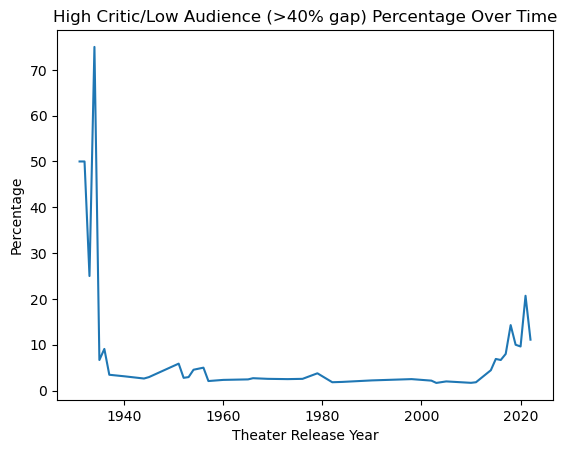

In [93]:
plt.plot('releaseYearTheaters', 'pct', data=rt_high_critic_extreme_theater_years_pct)
plt.xlabel('Theater Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/Low Audience (>40% gap) Percentage Over Time')

Text(0.5, 1.0, 'High Critic/Low Audience (>40% gap) Percentage Over Time')

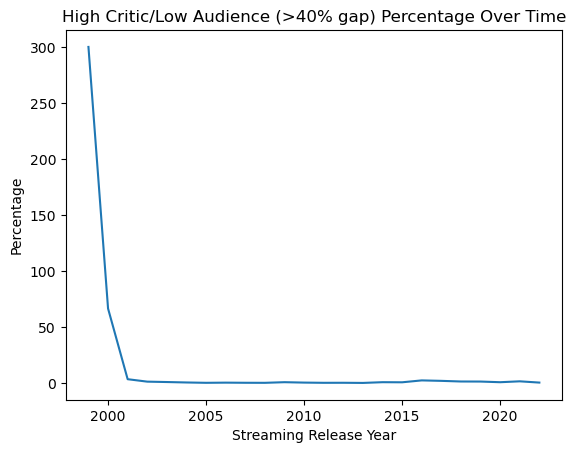

In [94]:
plt.plot('releaseYearStreaming', 'pct', data=rt_high_critic_extreme_streaming_years_pct)
plt.xlabel('Streaming Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/Low Audience (>40% gap) Percentage Over Time')

Text(0.5, 1.0, 'Low Critic/High Audience (>40% gap) Percentage Over Time')

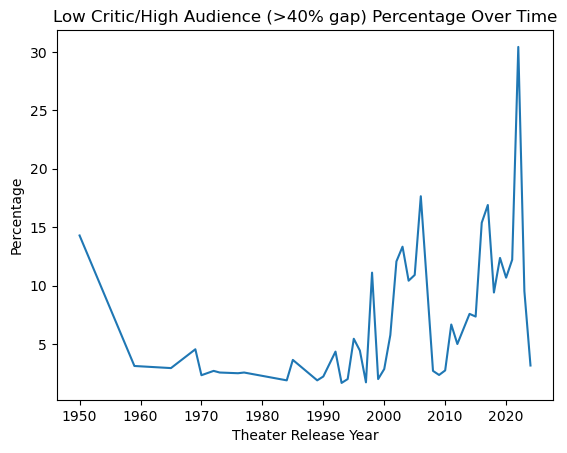

In [95]:
plt.plot('releaseYearTheaters', 'pct', data=rt_high_audience_extreme_theater_years_pct)
plt.xlabel('Theater Release Year')                            
plt.ylabel('Percentage')
plt.title('Low Critic/High Audience (>40% gap) Percentage Over Time')

Text(0.5, 1.0, 'Low Critic/High Audience (>40% gap) Percentage Over Time')

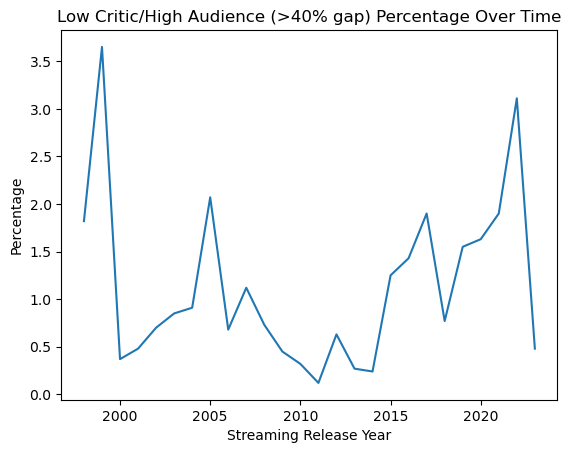

In [96]:
plt.plot('releaseYearStreaming', 'pct', data=rt_high_audience_extreme_streaming_years_pct)
plt.xlabel('Streaming Release Year')                            
plt.ylabel('Percentage')
plt.title('Low Critic/High Audience (>40% gap) Percentage Over Time')

Text(0.5, 1.0, 'High Critic/High Audience (>40% gap) Percentage Over Time')

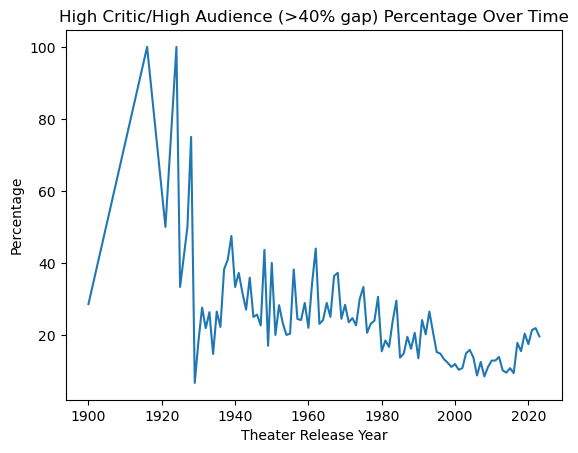

In [97]:
plt.plot('releaseYearTheaters', 'pct', data=rt_high_high_extreme_theater_years_pct)
plt.xlabel('Theater Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/High Audience (>40% gap) Percentage Over Time')

Text(0.5, 1.0, 'High Critic/High Audience (>40% gap) Percentage Over Time')

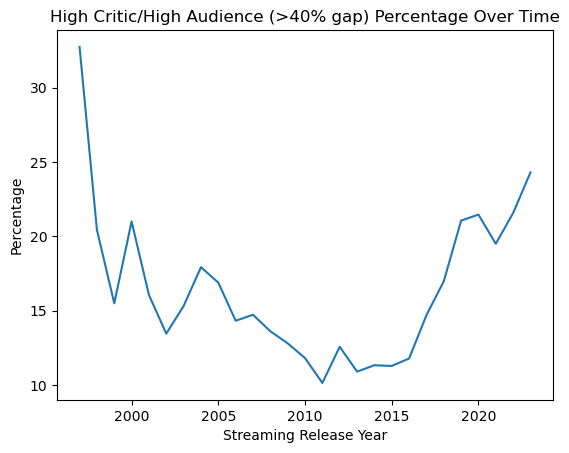

In [98]:
plt.plot('releaseYearStreaming', 'pct', data=rt_high_high_extreme_streaming_years_pct)
plt.xlabel('Streaming Release Year')                            
plt.ylabel('Percentage')
plt.title('High Critic/High Audience (>40% gap) Percentage Over Time')

### Streaming dates analysis

In [99]:
early_streaming = rotten_tomatoes_high_critic[rotten_tomatoes_high_critic['releaseYearStreaming'] < 2000]
early_streaming

,id,title,critic_score,critic_score_2023,critic_score_2024,critic_score_2025,audience_score,audience_score_2023,audience_score_2024,audience_score_2025,...,director,boxOffice,boxOfficeMM_clean,releaseDateTheaters,releaseDateStreaming,Unnamed: 21,releaseMonthTheaters,releaseYearTheaters,releaseMonthStreaming,releaseYearStreaming
1,10,10,68.0,68.0,68.0,NaN,56.0,53.0,56.0,NaN,...,Blake Edwards,NaN,NaN,1979-10-05,1997-09-03,NaN,10.0,1979.0,9.0,1997.0
777,1016592-postman_always_rings_twice,The Postman Always Rings Twice,79.0,79.0,NaN,NaN,58.0,58.0,NaN,NaN,...,Bob Rafelson,NaN,NaN,1981-03-20,1998-09-15,NaN,3.0,1981.0,9.0,1998.0
868,1019378-something_to_sing_about,Something to Sing About,83.0,83.0,NaN,NaN,29.0,29.0,NaN,NaN,...,Victor Schertzinger,NaN,NaN,1937-09-30,1999-08-10,NaN,9.0,1937.0,8.0,1999.0
1117,1040893-hero,Hero,67.0,67.0,NaN,NaN,50.0,50.0,NaN,NaN,...,Stephen Frears,$18.2M,18.2000,1992-10-02,1999-05-25,NaN,10.0,1992.0,5.0,1999.0
1197,1050728-sirens,Sirens,74.0,74.0,NaN,NaN,41.0,41.0,NaN,NaN,...,John Duigan,$5.8M,5.8000,1994-03-04,1999-05-18,NaN,3.0,1994.0,5.0,1999.0
1209,1054344-it_could_happen_to_you,It Could Happen to You,71.0,71.0,NaN,NaN,54.0,54.0,NaN,NaN,...,Andrew Bergman,$37.8M,37.8000,NaT,1998-08-25,NaN,NaN,NaN,8.0,1998.0
1302,1071167-twister,Twister,63.0,63.0,NaN,NaN,58.0,58.0,NaN,NaN,...,Jan de Bont,$241.7M,241.7000,1996-05-10,1998-11-24,44505.0,5.0,1996.0,11.0,1998.0
1476,1090805-dick,Dick,72.0,72.0,NaN,NaN,53.0,53.0,NaN,NaN,...,Andrew Fleming,$6.2M,6.2000,1999-08-04,1999-12-14,NaN,8.0,1999.0,12.0,1999.0
2883,africa_screams,Africa Screams,60.0,60.0,NaN,NaN,38.0,38.0,NaN,NaN,...,Charles Barton,NaN,NaN,1949-05-04,1999-06-01,NaN,5.0,1949.0,6.0,1999.0
3702,asphyx,The Asphyx,67.0,67.0,NaN,NaN,47.0,47.0,NaN,NaN,...,Peter Newbrook,NaN,NaN,1972-12-05,1998-03-03,NaN,12.0,1972.0,3.0,1998.0


## 2 - Are any genres or movie ratings more susceptible to this gap between audience and critic ratings?

### Top genres

In [100]:
rt_master_genre_melt = rotten_tomatoes_genre[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']].melt()
rt_master_genre = round(rt_master_genre_melt['value'].value_counts()/rt_master_genre_melt['value'].count()*100,2)
rt_master_genre

value
Drama                 23.04
Comedy                16.96
Mystery & thriller     9.55
Documentary            8.34
Horror                 5.91
Action                 4.93
Romance                4.53
Adventure              4.03
Crime                  2.99
Sci-fi                 2.78
Fantasy                2.71
Kids & family          2.63
Biography              2.01
Animation              1.64
History                1.58
Musical                1.38
Lgbtq+                 1.35
Music                  0.99
Western                0.91
War                    0.84
Holiday                0.67
Stand-up               0.07
Mystery & Thriller     0.04
Sports & fitness       0.02
Sports                 0.02
Sci-Fi                 0.01
Anime                  0.01
Nature                 0.01
Kids & Family          0.01
Special interest       0.01
Variety                0.01
Mystery                0.00
Other                  0.00
Entertainment          0.00
News                   0.00
Thriller      

In [101]:
#merge dataset to splat dataset, then run melt
rt_high_critic_genre_merge = pd.merge(rotten_tomatoes_high_critic, rotten_tomatoes_genre, on='id', how='left')
rt_high_critic_genre_melt = rt_high_critic_genre_merge[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']].melt()
rt_high_critic_genre = round(rt_high_critic_genre_melt['value'].value_counts()/rt_high_critic_genre_melt['value'].count()*100,2)
rt_high_critic_genre

value
Drama                 23.85
Comedy                16.61
Mystery & thriller    12.35
Horror                10.94
Documentary            6.88
Romance                3.86
Sci-fi                 3.39
Action                 3.24
Crime                  3.08
Adventure              2.88
Fantasy                2.14
Kids & family          1.81
Lgbtq+                 1.54
Biography              1.21
Musical                1.09
History                1.01
Western                0.91
Animation              0.85
Music                  0.65
Holiday                0.60
War                    0.58
Mystery & Thriller     0.25
Stand-up               0.16
Sci-Fi                 0.05
Kids & Family          0.02
News                   0.02
Sports & fitness       0.02
LGBTQ+                 0.02
Name: count, dtype: float64

In [102]:
rt_high_audience_genre_merge = pd.merge(rotten_tomatoes_high_audience, rotten_tomatoes_genre, on='id', how='left')
rt_high_audience_genre_melt = rt_high_audience_genre_merge[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']].melt()
rt_high_audience_genre = round(rt_high_audience_genre_melt['value'].value_counts()/rt_high_audience_genre_melt['value'].count()*100,2)
rt_high_audience_genre

value
Drama                 27.43
Comedy                18.23
Mystery & thriller     7.41
Romance                6.34
Action                 6.08
Adventure              4.39
Documentary            4.15
Fantasy                3.17
Kids & family          2.95
Crime                  2.78
Horror                 2.40
History                2.19
Biography              2.08
Musical                1.92
Sci-fi                 1.84
Animation              1.53
Lgbtq+                 1.46
Western                0.98
War                    0.92
Holiday                0.76
Music                  0.66
Mystery & Thriller     0.07
Stand-up               0.07
Sci-Fi                 0.04
Kids & Family          0.04
Sports                 0.04
Mystery                0.02
Nature                 0.02
Thriller               0.02
Anime                  0.02
Name: count, dtype: float64

In [103]:
rt_high_high_genre_merge = pd.merge(rotten_tomatoes_high_high, rotten_tomatoes_genre, on='id', how='left')
rt_high_high_genre_melt = rt_high_high_genre_merge[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']].melt()
rt_high_high_genre = round(rt_high_high_genre_melt['value'].value_counts()/rt_high_high_genre_melt['value'].count()*100,2)
rt_high_high_genre

value
Drama                 24.82
Documentary           15.50
Comedy                14.40
Mystery & thriller     6.08
Adventure              4.05
Romance                3.54
Action                 3.29
Biography              3.16
Crime                  2.99
Horror                 2.78
Fantasy                2.62
Kids & family          2.40
Animation              2.15
History                2.04
Sci-fi                 2.03
Music                  1.80
Musical                1.73
Lgbtq+                 1.57
War                    1.22
Western                1.07
Holiday                0.54
Stand-up               0.07
Sports & fitness       0.04
Sports                 0.02
Special interest       0.02
Nature                 0.02
Variety                0.01
Anime                  0.01
Entertainment          0.01
Short                  0.01
Name: count, dtype: float64

In [104]:
rt_high_critic_extreme_genre_merge = pd.merge(rotten_tomatoes_high_critic_extreme, rotten_tomatoes_genre, on='id', how='left')
rt_high_critic_extreme_genre_melt = rt_high_critic_extreme_genre_merge[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']].melt()
rt_high_critic_extreme_genre = round(rt_high_critic_extreme_genre_melt['value'].value_counts()/rt_high_critic_extreme_genre_melt['value'].count()*100,2)
rt_high_critic_extreme_genre

value
Drama                 18.73
Horror                17.58
Mystery & thriller    14.70
Comedy                14.12
Documentary            8.36
Action                 4.61
Romance                4.03
Sci-fi                 3.17
Adventure              2.59
Crime                  2.31
Musical                1.73
Fantasy                1.73
Music                  1.44
History                0.86
Western                0.86
Lgbtq+                 0.86
Biography              0.58
War                    0.58
Animation              0.29
Kids & family          0.29
Holiday                0.29
Stand-up               0.29
Name: count, dtype: float64

In [105]:
rt_high_audience_extreme_genre_merge = pd.merge(rotten_tomatoes_high_audience_extreme, rotten_tomatoes_genre, on='id', how='left')
rt_high_audience_extreme_genre_melt = rt_high_audience_extreme_genre_merge[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']].melt()
rt_high_audience_extreme_genre = round(rt_high_audience_extreme_genre_melt['value'].value_counts()/rt_high_audience_extreme_genre_melt['value'].count()*100,2)
rt_high_audience_extreme_genre

value
Drama                 29.57
Comedy                14.67
Mystery & thriller    12.42
Documentary            6.09
Romance                5.64
Action                 5.42
Crime                  3.39
Horror                 3.39
Adventure              3.16
Musical                2.26
Fantasy                2.26
Sci-fi                 1.81
History                1.81
Kids & family          1.58
Biography              1.35
Lgbtq+                 1.13
Music                  0.90
Holiday                0.68
Western                0.68
War                    0.45
Animation              0.45
Kids & Family          0.23
Mystery & Thriller     0.23
Stand-up               0.23
Sports                 0.23
Name: count, dtype: float64

In [106]:
rt_high_high_extreme_genre_merge = pd.merge(rotten_tomatoes_high_high_extreme, rotten_tomatoes_genre, on='id', how='left')
rt_high_high_extreme_genre_melt = rt_high_critic_genre_merge[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']].melt()
rt_high_high_extreme_genre = round(rt_high_critic_genre_melt['value'].value_counts()/rt_high_critic_genre_melt['value'].count()*100,2)
rt_high_high_extreme_genre

value
Drama                 23.85
Comedy                16.61
Mystery & thriller    12.35
Horror                10.94
Documentary            6.88
Romance                3.86
Sci-fi                 3.39
Action                 3.24
Crime                  3.08
Adventure              2.88
Fantasy                2.14
Kids & family          1.81
Lgbtq+                 1.54
Biography              1.21
Musical                1.09
History                1.01
Western                0.91
Animation              0.85
Music                  0.65
Holiday                0.60
War                    0.58
Mystery & Thriller     0.25
Stand-up               0.16
Sci-Fi                 0.05
Kids & Family          0.02
News                   0.02
Sports & fitness       0.02
LGBTQ+                 0.02
Name: count, dtype: float64

### Movie ratings rankings

In [107]:
rt_master_ratings = round((rotten_tomatoes_final['rating'].value_counts()/rotten_tomatoes_final['rating'].count())*100,2).sort_values(ascending=False)

In [108]:
rt_master_ratings

rating
R        55.90
PG-13    30.62
PG       12.56
TV14      0.33
TVMA      0.17
TVPG      0.15
NR        0.15
NC-17     0.10
G         0.02
Name: count, dtype: float64

In [109]:
rt_high_critic_ratings = round((rotten_tomatoes_high_critic['rating'].value_counts()/rotten_tomatoes_high_critic['rating'].count())*100,2).sort_values(ascending=False)

In [110]:
rt_high_critic_ratings

rating
R        71.58
PG-13    18.47
PG        7.87
NR        1.09
TV14      0.44
TVMA      0.33
TVPG      0.11
NC-17     0.11
Name: count, dtype: float64

In [111]:
rt_high_audience_ratings = round((rotten_tomatoes_high_audience['rating'].value_counts()/rotten_tomatoes_high_audience['rating'].count())*100,2).sort_values(ascending=False)

In [112]:
rt_high_audience_ratings

rating
R        44.82
PG-13    38.77
PG       15.92
G         0.16
TV14      0.08
TVPG      0.08
NR        0.08
NC-17     0.08
Name: count, dtype: float64

In [113]:
rt_high_high_ratings = round((rotten_tomatoes_high_high['rating'].value_counts()/rotten_tomatoes_high_high['rating'].count())*100,2).sort_values(ascending=False)

In [114]:
rt_high_high_ratings

rating
R        52.68
PG-13    31.18
PG       15.15
TV14      0.33
TVMA      0.33
TVPG      0.22
NC-17     0.07
NR        0.04
Name: count, dtype: float64

In [115]:
rotten_tomatoes_high_critic_extreme_ratings = round((rotten_tomatoes_high_critic_extreme['rating'].value_counts()/rotten_tomatoes_high_critic_extreme['rating'].count())*100,2).sort_values(ascending=False)

In [116]:
rotten_tomatoes_high_critic_extreme_ratings

rating
R        82.14
PG-13     7.14
PG        7.14
TV14      3.57
Name: count, dtype: float64

In [117]:
rotten_tomatoes_high_audience_extreme_ratings = round((rotten_tomatoes_high_audience_extreme['rating'].value_counts()/rotten_tomatoes_high_audience_extreme['rating'].count())*100,2).sort_values(ascending=False)

In [118]:
rotten_tomatoes_high_audience_extreme_ratings

rating
R        46.62
PG-13    38.35
PG       14.29
NR        0.75
Name: count, dtype: float64

In [119]:
rotten_tomatoes_high_high_extreme_ratings = round((rotten_tomatoes_high_high_extreme['rating'].value_counts()/rotten_tomatoes_high_high_extreme['rating'].count())*100,2).sort_values(ascending=False)

In [120]:
rotten_tomatoes_high_high_extreme_ratings

rating
R        46.47
PG-13    34.47
PG       18.24
TVPG      0.47
TVMA      0.24
TV14      0.12
Name: count, dtype: float64

## 3 - Other stats

### Avg runtime

In [121]:
rotten_tomatoes_final['runtimeMinutes'].mean()

99.83249506017604

In [122]:
rotten_tomatoes_final.groupby('rating')['runtimeMinutes'].mean()

rating
G         92.000000
NC-17    106.000000
NR        98.416667
PG        98.878431
PG-13    106.470233
R        102.843405
TV14      98.111111
TVMA     111.285714
TVPG     110.083333
Name: runtimeMinutes, dtype: float64

In [123]:
rotten_tomatoes_high_critic['runtimeMinutes'].mean()

95.00978892627715

In [124]:
rotten_tomatoes_high_critic.groupby('rating')['runtimeMinutes'].mean()

rating
NC-17     98.000000
NR        98.500000
PG        97.347222
PG-13    102.455621
R         99.261468
TV14     114.500000
TVMA      95.000000
TVPG      96.000000
Name: runtimeMinutes, dtype: float64

In [125]:
rotten_tomatoes_high_audience['runtimeMinutes'].mean()

103.96385542168674

In [126]:
rotten_tomatoes_high_audience.groupby('rating')['runtimeMinutes'].mean()

rating
G         92.000000
NC-17    112.000000
NR       121.000000
PG       102.210000
PG-13    110.246407
R        105.816726
TV14      96.000000
TVPG      94.000000
Name: runtimeMinutes, dtype: float64

In [127]:
rotten_tomatoes_high_high['runtimeMinutes'].mean()

101.69856661045532

In [128]:
rotten_tomatoes_high_high.groupby('rating')['runtimeMinutes'].mean()

rating
NC-17     94.500000
NR        75.000000
PG       100.207317
PG-13    110.296209
R        108.510877
TV14     100.555556
TVMA     115.666667
TVPG     100.166667
Name: runtimeMinutes, dtype: float64

In [129]:
rotten_tomatoes_high_critic_extreme['runtimeMinutes'].mean()

88.97014925373135

In [130]:
rotten_tomatoes_high_critic_extreme.groupby('rating')['runtimeMinutes'].mean()

rating
PG        82.000000
PG-13    104.000000
R         94.391304
TV14      90.000000
Name: runtimeMinutes, dtype: float64

In [131]:
rotten_tomatoes_high_audience_extreme['runtimeMinutes'].mean()

103.25098039215686

In [132]:
rotten_tomatoes_high_audience_extreme.groupby('rating')['runtimeMinutes'].mean()

rating
NR       121.000000
PG        99.263158
PG-13    114.058824
R        102.483871
Name: runtimeMinutes, dtype: float64

In [133]:
rotten_tomatoes_high_high_extreme['runtimeMinutes'].mean()

103.5412386263575

In [134]:
rotten_tomatoes_high_high_extreme.groupby('rating')['runtimeMinutes'].mean()

rating
PG       101.993548
PG-13    114.464164
R        112.870886
TV14      94.000000
TVMA     123.500000
TVPG     101.250000
Name: runtimeMinutes, dtype: float64

### Top directors

In [135]:
rt_directors_simple = rotten_tomatoes_directors.drop(['id', 'title', 'director'], axis=1)

In [136]:
rt_master_directors_melt = rt_directors_simple.melt()
rt_master_directors = round(rt_master_directors_melt['value'].value_counts()/rt_master_directors_melt['value'].count()*100,2)
rt_master_directors

value
Woody Allen          0.20
Alfred Hitchcock     0.17
Clint Eastwood       0.16
John Ford            0.15
Steven Soderbergh    0.15
                     ... 
John Erman           0.00
Shawn Linden         0.00
Joshua Locy          0.00
Greg Swinson         0.00
Srdjan Spasojevic    0.00
Name: count, Length: 11412, dtype: float64

In [137]:
rt_master_directors_melt['value'].value_counts()

value
Woody Allen          48
Alfred Hitchcock     41
Clint Eastwood       38
John Ford            37
Steven Soderbergh    36
                     ..
John Erman            1
Shawn Linden          1
Joshua Locy           1
Greg Swinson          1
Srdjan Spasojevic     1
Name: count, Length: 11412, dtype: int64

In [138]:
#merge dataset to splat dataset, then run melt
rt_high_critic_director_merge = pd.merge(rotten_tomatoes_high_critic, rotten_tomatoes_directors, on='id', how='left')
rt_high_critic_director_melt = rt_high_critic_director_merge[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']].melt()
rt_high_critic_director = round(rt_high_critic_director_melt['value'].value_counts()/rt_high_critic_director_melt['value'].count()*100,2)
rt_high_critic_director

value
Joe Swanberg         0.28
Abel Ferrara         0.28
David Cronenberg     0.25
Steven Soderbergh    0.25
George A. Romero     0.22
                     ... 
Leon Ford            0.03
Timothy Busfield     0.03
Irwin Winkler        0.03
Tamra Davis          0.03
Andrew Kasch         0.03
Name: count, Length: 2766, dtype: float64

In [139]:
rt_high_critic_director_melt['value'].value_counts()

value
Joe Swanberg         10
Abel Ferrara         10
David Cronenberg      9
Steven Soderbergh     9
George A. Romero      8
                     ..
Leon Ford             1
Timothy Busfield      1
Irwin Winkler         1
Tamra Davis           1
Andrew Kasch          1
Name: count, Length: 2766, dtype: int64

In [140]:
rt_high_audience_director_merge = pd.merge(rotten_tomatoes_high_audience, rotten_tomatoes_directors, on='id', how='left')
rt_high_audience_director_melt = rt_high_audience_director_merge[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']].melt()
rt_high_audience_director = round(rt_high_audience_director_melt['value'].value_counts()/rt_high_audience_director_melt['value'].count()*100,2)
rt_high_audience_director

value
Tyler Perry      0.51
Michael Bay      0.26
Ridley Scott     0.22
Tony Scott       0.22
Sean McNamara    0.22
                 ... 
Ron Krauss       0.04
Paul Wendkos     0.04
Don Jurwich      0.04
Ivan Reitman     0.04
Alex Takacs      0.04
Name: count, Length: 2162, dtype: float64

In [141]:
rt_high_audience_director_melt['value'].value_counts()

value
Tyler Perry      14
Michael Bay       7
Ridley Scott      6
Tony Scott        6
Sean McNamara     6
                 ..
Ron Krauss        1
Paul Wendkos      1
Don Jurwich       1
Ivan Reitman      1
Alex Takacs       1
Name: count, Length: 2162, dtype: int64

In [142]:
rt_high_high_director_merge = pd.merge(rotten_tomatoes_high_high, rotten_tomatoes_directors, on='id', how='left')
rt_high_high_director_melt = rt_high_high_director_merge[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']].melt()
rt_high_high_director = round(rt_high_high_director_melt['value'].value_counts()/rt_high_high_director_melt['value'].count()*100,2)
rt_high_high_director

value
Martin Scorsese         0.30
Alfred Hitchcock        0.27
Steven Spielberg        0.25
John Ford               0.24
William Wyler           0.23
                        ... 
Sophia Nahli Allison    0.01
Max Walker-Silverman    0.01
Matt Hullum             0.01
Lee H. Katzin           0.01
Jason Ragosta           0.01
Name: count, Length: 5933, dtype: float64

In [143]:
rt_high_high_director_melt['value'].value_counts()

value
Martin Scorsese         32
Alfred Hitchcock        29
Steven Spielberg        27
John Ford               26
William Wyler           25
                        ..
Sophia Nahli Allison     1
Max Walker-Silverman     1
Matt Hullum              1
Lee H. Katzin            1
Jason Ragosta            1
Name: count, Length: 5933, dtype: int64

In [144]:
rt_high_critic_extreme_director_merge = pd.merge(rotten_tomatoes_high_critic_extreme, rotten_tomatoes_directors, on='id', how='left')
rt_high_critic_extreme_director_melt = rt_high_critic_extreme_director_merge[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']].melt()
rt_high_critic_extreme_director = round(rt_high_critic_extreme_director_melt['value'].value_counts()/rt_high_critic_extreme_director_melt['value'].count()*100,2)
rt_high_critic_extreme_director

value
Edgar G. Ulmer    1.31
Archie Mayo       0.87
James Ivory       0.87
Lucia Small       0.87
Amelia Moses      0.87
                  ... 
Russ Meyer        0.44
Ben Wheatley      0.44
Jared Bentley     0.44
Roger Corman      0.44
Alberto Mielgo    0.44
Name: count, Length: 223, dtype: float64

In [145]:
rt_high_critic_extreme_director_melt['value'].value_counts()

value
Edgar G. Ulmer    3
Archie Mayo       2
James Ivory       2
Lucia Small       2
Amelia Moses      2
                 ..
Russ Meyer        1
Ben Wheatley      1
Jared Bentley     1
Roger Corman      1
Alberto Mielgo    1
Name: count, Length: 223, dtype: int64

In [146]:
rt_high_audience_extreme_director_merge = pd.merge(rotten_tomatoes_high_audience_extreme, rotten_tomatoes_directors, on='id', how='left')
rt_high_audience_extreme_director_melt = rt_high_audience_extreme_director_merge[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']].melt()
rt_high_audience_extreme_director = round(rt_high_audience_extreme_director_melt['value'].value_counts()/rt_high_audience_extreme_director_melt['value'].count()*100,2)
rt_high_audience_extreme_director

value
Alex Kendrick     1.45
Tyler Perry       1.45
Dinesh D'Souza    1.09
Brian Baugh       0.72
Bruce Schooley    0.72
                  ... 
Ron Howard        0.36
Tom Shadyac       0.36
Paul Feig         0.36
Jessie Nelson     0.36
Alex Takacs       0.36
Name: count, Length: 263, dtype: float64

In [147]:
rt_high_audience_extreme_director_melt['value'].value_counts()

value
Alex Kendrick     4
Tyler Perry       4
Dinesh D'Souza    3
Brian Baugh       2
Bruce Schooley    2
                 ..
Ron Howard        1
Tom Shadyac       1
Paul Feig         1
Jessie Nelson     1
Alex Takacs       1
Name: count, Length: 263, dtype: int64

In [148]:
rt_high_high_extreme_director_merge = pd.merge(rotten_tomatoes_high_high_extreme, rotten_tomatoes_directors, on='id', how='left')
rt_high_high_extreme_director_melt = rt_high_high_extreme_director_merge[['director_1', 'director_2', 'director_3', 'director_4', 'director_5', 'director_6', 'director_7', 'director_8', 'director_9', 'director_10', 'director_11', 'director_12', 'director_13', 'director_14', 'director_15', 'director_16', 'director_17', 'director_18', 'director_19', 'director_20']].melt()
rt_high_high_extreme_director = round(rt_high_high_extreme_director_melt['value'].value_counts()/rt_high_high_extreme_director_melt['value'].count()*100,2)
rt_high_high_extreme_director

value
Martin Scorsese     0.43
William Wyler       0.43
Alfred Hitchcock    0.41
Steven Spielberg    0.36
Woody Allen         0.36
                    ... 
Eric McEver         0.03
Mary McCartney      0.03
Maia Wechsler       0.03
Michael Govier      0.03
Nobuhiro Suwa       0.03
Name: count, Length: 2652, dtype: float64

In [149]:
rt_high_high_extreme_director_melt['value'].value_counts()

value
Martin Scorsese     17
William Wyler       17
Alfred Hitchcock    16
Steven Spielberg    14
Woody Allen         14
                    ..
Eric McEver          1
Mary McCartney       1
Maia Wechsler        1
Michael Govier       1
Nobuhiro Suwa        1
Name: count, Length: 2652, dtype: int64

## 4 - What is the relationship between ratings and box office numbers?

In [150]:
box_office = pd.read_excel('../data/box_office_domestic.xlsx')

In [151]:
box_office = box_office.drop(['year'], axis=1)

In [164]:
rt_master_box_office = pd.merge(rotten_tomatoes_final, box_office, on='title', how='left')

In [166]:
rt_master_box_office['domestic_box_office_MM'] = rt_master_box_office['domestic_box_office_MM'].fillna(rt_master_box_office['boxOfficeMM_clean'])

In [168]:
rt_master_box_office['domestic_box_office_MM'].mean()

27.495709418124914

In [173]:
def box_office_mean(df):
    rt_box_office = pd.merge(df, box_office, on='title', how='left')
    rt_box_office['domestic_box_office_MM'] = rt_box_office['domestic_box_office_MM'].fillna(rt_box_office['boxOfficeMM_clean'])
    box_office_avg = rt_box_office['domestic_box_office_MM'].mean()
    return box_office_avg

In [174]:
box_office_mean(rotten_tomatoes_high_critic)

16.374712934996715

In [175]:
box_office_mean(rotten_tomatoes_high_audience)

29.877040662323566

In [176]:
box_office_mean(rotten_tomatoes_high_high)

33.31908096897296

In [177]:
box_office_mean(rotten_tomatoes_high_critic_extreme)

10.99169285714286

In [178]:
box_office_mean(rotten_tomatoes_high_audience_extreme)

17.112393209876544

In [179]:
box_office_mean(rotten_tomatoes_high_high_extreme)

41.35294337349397

## 5 - What is the relationship between ratings and movie awards?

In [183]:
oscar_awards_import = pd.read_csv('../data/oscar_awards_edited.csv')

In [186]:
rt_high_critic_awards = pd.merge(oscar_awards_import, rotten_tomatoes_high_critic, left_on='film', right_on='title', how='left')

In [188]:
rt_high_critic_awards_filtered = rt_high_critic_awards[rt_high_critic_awards['id'].notnull()]

In [190]:
rt_high_critic_awards_filtered['status'].value_counts()

status
Nominated    479
Won           89
Name: count, dtype: int64

In [191]:
rt_high_critic_awards_filtered['award_category'].value_counts()

award_category
Actress In a Supporting Role                                    34
Costume Design                                                  31
Art Direction                                                   26
Cinematography                                                  25
Directing                                                       22
                                                                ..
Music (Song--Original for the Picture)                           1
Short Subject (Live Action)                                      1
Music (Original Music Score)                                     1
Music (Original Score--For a Motion Picture [Not a Musical])     1
Outstanding Picture                                              1
Name: count, Length: 78, dtype: int64

In [192]:
def oscar_awards_counts(df):
    rt_awards = pd.merge(oscar_awards_import, df, left_on='film', right_on='title', how='left')
    rt_awards_filtered = rt_awards[rt_awards['id'].notnull()]
    won_nominated_counts = rt_awards_filtered['status'].value_counts()
    return won_nominated_counts

In [198]:
def oscar_categories_counts(df):
    rt_awards = pd.merge(oscar_awards_import, df, left_on='film', right_on='title', how='left')
    rt_awards_filtered = rt_awards[rt_awards['id'].notnull()]
    award_category_counts = rt_awards_filtered['award_category'].value_counts()
    return award_category_counts

In [193]:
oscar_awards_counts(rotten_tomatoes_high_audience)

status
Nominated    381
Won           89
Name: count, dtype: int64

In [199]:
oscar_categories_counts(rotten_tomatoes_high_audience)

award_category
Music (Original Song)                                              38
Costume Design                                                     28
Cinematography                                                     27
Art Direction                                                      22
Sound                                                              21
                                                                   ..
Writing (Story and Screenplay--Written Directly for the Screen)     1
Writing (Screenplay--Based on Material from Another Medium)         1
Music (Song--Original for the Picture)                              1
Music (Original Song Score)                                         1
Special Effects                                                     1
Name: count, Length: 69, dtype: int64

In [194]:
oscar_awards_counts(rotten_tomatoes_high_high)

status
Nominated    5518
Won          1700
Name: count, dtype: int64

In [200]:
oscar_categories_counts(rotten_tomatoes_high_high)

award_category
Directing                       453
Film Editing                    415
Actor In a Supporting Role      411
Actress In a Supporting Role    399
Best Picture                    384
                               ... 
Short Subject (Color)             1
Documentary Short Film            1
Documentary Feature Film          1
Outstanding Picture               1
Unique and Artistic Picture       1
Name: count, Length: 97, dtype: int64

In [195]:
oscar_awards_counts(rotten_tomatoes_high_critic_extreme)

status
Nominated    29
Won           1
Name: count, dtype: int64

In [201]:
oscar_categories_counts(rotten_tomatoes_high_critic_extreme)

award_category
Outstanding Production                                                                                                                       3
Actress In a Leading Role                                                                                                                    3
Costume Design                                                                                                                               3
Art Direction                                                                                                                                2
Cinematography                                                                                                                               2
Sound                                                                                                                                        2
Special Effects                                                                                                                

In [196]:
oscar_awards_counts(rotten_tomatoes_high_audience_extreme)

status
Nominated    35
Won           4
Name: count, dtype: int64

In [202]:
oscar_categories_counts(rotten_tomatoes_high_audience_extreme)

award_category
Costume Design                                                  4
Cinematography                                                  4
Music (Original Song)                                           3
Art Direction                                                   3
Actress In a Leading Role                                       2
Best Picture                                                    2
Actress In a Supporting Role                                    2
Foreign Language Film                                           2
Actress                                                         2
Actor                                                           1
Cinematography (Black-And-White)                                1
Writing (Screenplay--Based on Material from Another Medium)     1
Sound                                                           1
Music (Original Score--For a Motion Picture [Not a Musical])    1
Actor In a Supporting Role                                   

In [197]:
oscar_awards_counts(rotten_tomatoes_high_high_extreme)

status
Nominated    3005
Won          1091
Name: count, dtype: int64

In [203]:
oscar_categories_counts(rotten_tomatoes_high_high_extreme)

award_category
Directing                                          304
Film Editing                                       265
Best Picture                                       251
Actor In a Supporting Role                         249
Actress In a Supporting Role                       201
                                                  ... 
Music (Original Song Score or Adaptation Score)      1
Short Subject (Comedy)                               1
Short Subject (Live Action)                          1
Writing                                              1
Unique and Artistic Picture                          1
Name: count, Length: 91, dtype: int64

## 6 - Superlatives